In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (118).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (31).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (94).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (120).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (73).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (86).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (19).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (39).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (95).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (9).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (75).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (99).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (34).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (82).jpg
/kaggle/input/lung-cancer/Lungnew/val/Benign/Bengin case (18).jpg
/kaggle/i

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_val_test = ImageDataGenerator(rescale=1./255)

In [6]:
train_dir = "/kaggle/input/lung-cancer/Lungnew/train"
val_dir = "/kaggle/input/lung-cancer/Lungnew/val"
test_dir = "/kaggle/input/lung-cancer/Lungnew/test"

In [7]:
batch_size = 32
target_size = (299, 299)

train_generator = datagen_train.flow_from_directory(
    train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical')

val_generator = datagen_val_test.flow_from_directory(
    val_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical')

test_generator = datagen_val_test.flow_from_directory(
    test_dir, target_size=target_size, batch_size=1, class_mode='categorical', shuffle=False)

Found 767 images belonging to 3 classes.
Found 166 images belonging to 3 classes.
Found 164 images belonging to 3 classes.


In [8]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
for layer in base_model.layers[:249]:
    layer.trainable = False

for layer in base_model.layers[249:]:
    layer.trainable = True

In [10]:
global_avg_pool = GlobalAveragePooling2D()(base_model.output)
dense1 = Dense(512, activation='relu')(global_avg_pool)
dropout = Dropout(0.5)(dense1)
out_layer = Dense(train_generator.num_classes, activation='softmax')(dropout)

model = Model(inputs=base_model.input, outputs=out_layer)

In [11]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

In [13]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7215 - loss: 0.6947 - val_accuracy: 0.8675 - val_loss: 0.2950 - learning_rate: 1.0000e-04
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 604ms/step - accuracy: 0.8671 - loss: 0.3139 - val_accuracy: 0.8735 - val_loss: 0.3208 - learning_rate: 1.0000e-04
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 591ms/step - accuracy: 0.8946 - loss: 0.2584 - val_accuracy: 0.8855 - val_loss: 0.2546 - learning_rate: 1.0000e-04
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 590ms/step - accuracy: 0.9058 - loss: 0.2065 - val_accuracy: 0.8494 - val_loss: 0.3802 - learning_rate: 1.0000e-04
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 605ms/step - accuracy: 0.9279 - loss: 0.1795 - val_accuracy: 0.9217 - val_loss: 0.2171 - learning_rate: 1.0000e-04
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 593ms/step - accuracy: 0.9394 - loss: 0.1619 - val_accuracy: 0.9217 - val_loss: 0.2553 - learning_rate: 1.0000e-04
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 619ms/step - accuracy: 0.9461 

In [14]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

164/164 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9493 - loss: 0.2480
Test Accuracy: 96.95%


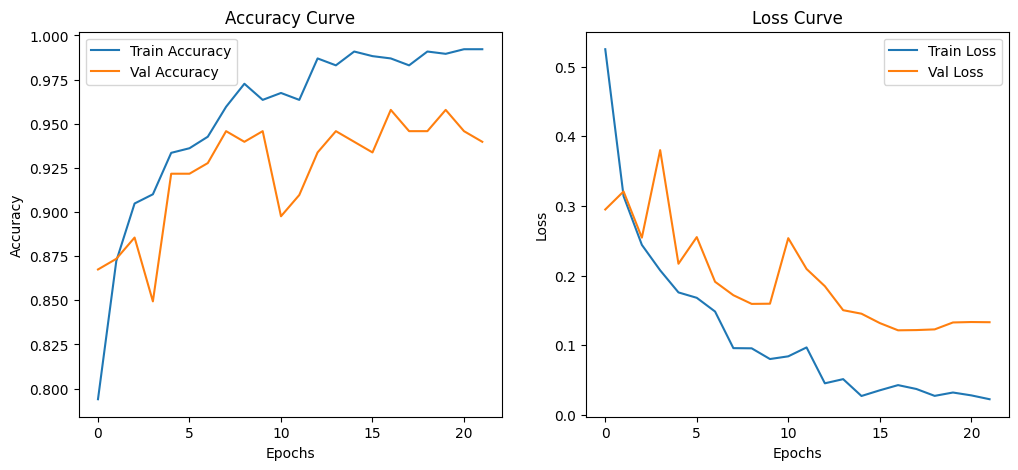

In [15]:
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')
    
    plt.show()

plot_training_curves(history)

164/164 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
              precision    recall  f1-score   support

      Benign       1.00      0.83      0.91        18
   Malignant       0.98      1.00      0.99        84
      Normal       0.95      0.97      0.96        62

    accuracy                           0.97       164
   macro avg       0.98      0.93      0.95       164
weighted avg       0.97      0.97      0.97       164



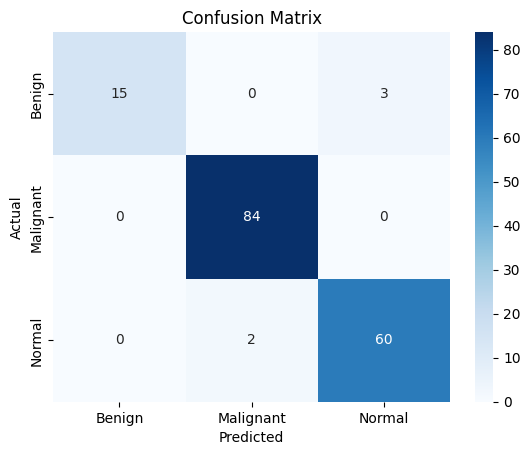

In [16]:
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Save the entire model (architecture + weights + optimizer state)
model.save('inceptionv3_lung_cancer_classifier.h5')


In [18]:
class_labels = ["Benign", "Malignant", "Normal"]


In [19]:
from sklearn.metrics import classification_report, precision_score, recall_score

# Define class labels explicitly
class_labels = ["Benign", "Malignant", "Normal"]

# Compute classification report
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Extract and print Precision & Recall for each class
print("\nPrecision and Recall for Each Class:")
for label in class_labels:
    precision = report[label]['precision']
    recall = report[label]['recall']
    print(f"{label}: Precision = {precision:.2f}, Recall = {recall:.2f}")

# Compute Overall Precision & Recall
overall_precision = precision_score(y_true, y_pred, average='macro')
overall_recall = recall_score(y_true, y_pred, average='macro')

print(f"\nOverall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")



Precision and Recall for Each Class:
Benign: Precision = 1.00, Recall = 0.83
Malignant: Precision = 0.98, Recall = 1.00
Normal: Precision = 0.95, Recall = 0.97

Overall Precision: 0.98
Overall Recall: 0.93


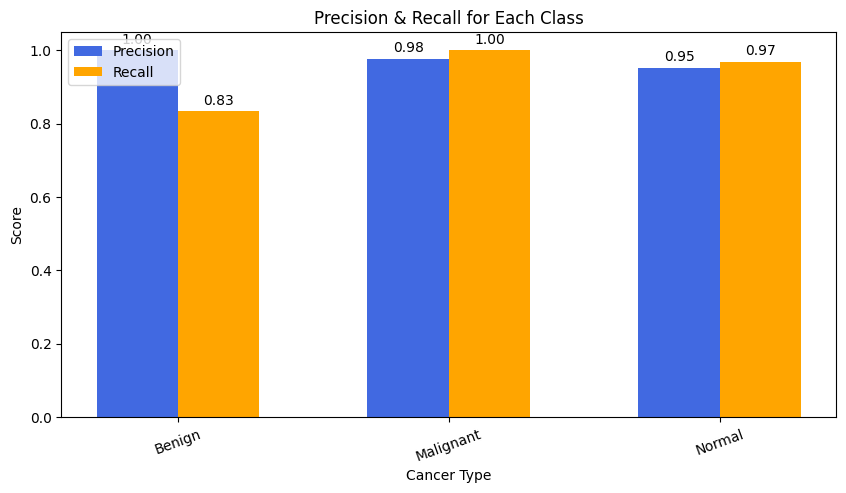

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score

# Define class labels explicitly
class_labels = ["Benign", "Malignant", "Normal"]

# Compute classification report
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Extract precision & recall values
precision_values = [report[label]['precision'] for label in class_labels]
recall_values = [report[label]['recall'] for label in class_labels]

# Plot Precision & Recall
x = np.arange(len(class_labels))  # X-axis locations
width = 0.3  # Width of bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, precision_values, width, label='Precision', color='royalblue')
rects2 = ax.bar(x + width/2, recall_values, width, label='Recall', color='orange')

# Labels & Titles
ax.set_xlabel("Cancer Type")
ax.set_ylabel("Score")
ax.set_title("Precision & Recall for Each Class")
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=20)
ax.legend()

# Show values on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


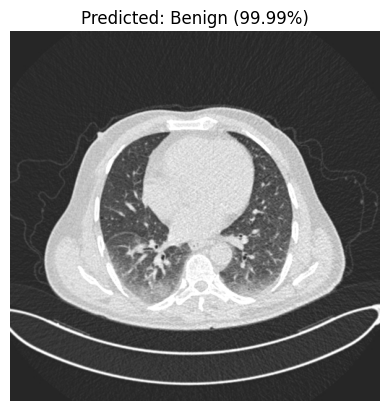

Predicted Class: Benign
Confidence: 99.99%
Tumor Type: Benign


In [21]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "inceptionv3_lung_cancer_classifier.h5"  # Update with your model path
model = load_model(model_path)

# Define class labels in the same order as used during training
class_labels = ["Benign", "Malignant", "Normal"]

def preprocess_image(image_path, img_size=(299, 299)):
    """Loads and preprocesses an image for prediction."""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for display
    image_resized = cv2.resize(image_rgb, img_size)  # Resize to match model input
    image_normalized = image_resized / 255.0  # Normalize pixel values
    image_expanded = np.expand_dims(image_normalized, axis=0)  # Add batch dimension
    return image_expanded, image_rgb

def predict_tumor(image_path):
    """Predicts the class of the given image and prints the tumor type."""
    image, original_image = preprocess_image(image_path)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)  # Get index of highest probability
    confidence = np.max(predictions) * 100  # Convert to percentage
    predicted_label = class_labels[predicted_class]

    # Define tumor type
    if predicted_label == "Normal":
        tumor_type = "No tumor detected (Healthy Lungs)"
    else:
        tumor_type = f"Tumor Type: {predicted_label}"

    # Display the image
    plt.imshow(original_image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.show()

    return predicted_label, confidence, tumor_type

# Test a sample image
image_path = "/kaggle/input/lung-cancer/Lungnew/test/Benign/Bengin case (63).jpg"  
predicted_label, confidence, tumor_type = predict_tumor(image_path)

# Print results
print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")
print(f"{tumor_type}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


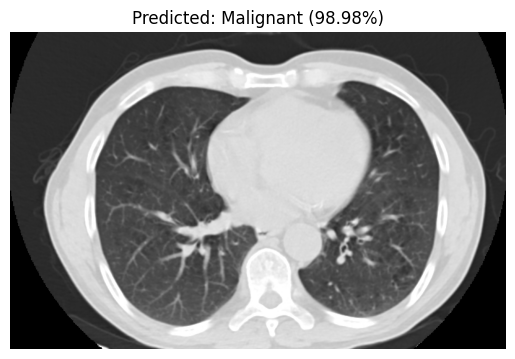

Predicted Class: Malignant
Confidence: 98.98%
Tumor Type: Malignant


In [22]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "inceptionv3_lung_cancer_classifier.h5"  # Update with your model path
model = load_model(model_path)

# Define class labels in the same order as used during training
class_labels = ["Benign", "Malignant", "Normal"]

def preprocess_image(image_path, img_size=(299, 299)):
    """Loads and preprocesses an image for prediction."""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for display
    image_resized = cv2.resize(image_rgb, img_size)  # Resize to match model input
    image_normalized = image_resized / 255.0  # Normalize pixel values
    image_expanded = np.expand_dims(image_normalized, axis=0)  # Add batch dimension
    return image_expanded, image_rgb

def predict_tumor(image_path):
    """Predicts the class of the given image and prints the tumor type."""
    image, original_image = preprocess_image(image_path)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)  # Get index of highest probability
    confidence = np.max(predictions) * 100  # Convert to percentage
    predicted_label = class_labels[predicted_class]

    # Define tumor type
    if predicted_label == "Normal":
        tumor_type = "No tumor detected (Healthy Lungs)"
    else:
        tumor_type = f"Tumor Type: {predicted_label}"

    # Display the image
    plt.imshow(original_image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.show()

    return predicted_label, confidence, tumor_type

# Test a sample image
image_path = "/kaggle/input/lung-cancer/Lungnew/test/Malignant/Malignant case (223).jpg"  
predicted_label, confidence, tumor_type = predict_tumor(image_path)

# Print results
print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")
print(f"{tumor_type}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


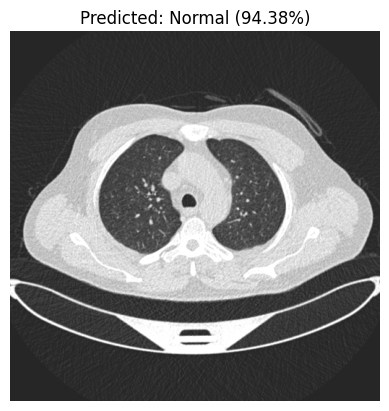

Predicted Class: Normal
Confidence: 94.38%
No tumor detected (Healthy Lungs)


In [23]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "inceptionv3_lung_cancer_classifier.h5"  # Update with your model path
model = load_model(model_path)

# Define class labels in the same order as used during training
class_labels = ["Benign", "Malignant", "Normal"]

def preprocess_image(image_path, img_size=(299, 299)):
    """Loads and preprocesses an image for prediction."""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for display
    image_resized = cv2.resize(image_rgb, img_size)  # Resize to match model input
    image_normalized = image_resized / 255.0  # Normalize pixel values
    image_expanded = np.expand_dims(image_normalized, axis=0)  # Add batch dimension
    return image_expanded, image_rgb

def predict_tumor(image_path):
    """Predicts the class of the given image and prints the tumor type."""
    image, original_image = preprocess_image(image_path)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)  # Get index of highest probability
    confidence = np.max(predictions) * 100  # Convert to percentage
    predicted_label = class_labels[predicted_class]

    # Define tumor type
    if predicted_label == "Normal":
        tumor_type = "No tumor detected (Healthy Lungs)"
    else:
        tumor_type = f"Tumor Type: {predicted_label}"

    # Display the image
    plt.imshow(original_image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.show()

    return predicted_label, confidence, tumor_type

# Test a sample image
image_path = "/kaggle/input/lung-cancer/Lungnew/test/Normal/Normal case (267).jpg"  
predicted_label, confidence, tumor_type = predict_tumor(image_path)

# Print results
print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")
print(f"{tumor_type}")


In [24]:
# Save the trained model to a file
model.save("inceptionv3_lung_tumor_model.h5")

print("Model saved successfully as inceptionv3_lung_tumor_model.h5")


Model saved successfully as inceptionv3_lung_tumor_model.h5
